<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---

# 🌱 **기본 과제**

In [1]:
!pip install category_encoders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.1 MB/s 


In [2]:
!pip install eli5 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 8.2 MB/s 
     |████████████████████████████████| 133 kB 24.3 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=9049635631f948341d655f62b9fc7455a20de8d1f7527a8668aaf393c426c8b9
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from eli5.sklearn import PermutationImportance

## **Part 1. 데이터 준비**

- 데이터셋을 불러오세요.
  - https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
- 타겟과 특성을 지정해 주세요. 
  - 타겟은 `Attrition`입니다.  
- 훈련/평가 데이터셋을 분리하세요.
  - 훈련/평가 데이터의 비율은 8:2로 합니다.
  - `random_state=42`로 설정합니다. 


In [4]:
# 데이터셋 불러오기 
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
target = 'Attrition'
features = list(df.columns)
features.remove(target)
X = df[features]
y = df[target]

In [6]:
y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # stratify: target 비율 맞추기

## **Part 2. 모델 학습**

- 타겟 Label을 `No=0`, `Yes=1`로 변환하세요.
  - 훈련/평가 데이터 모두 변환합니다. 
- 훈련 데이터셋에 대하여 기준모델의 AUC score를 확인하세요.
  - 기준모델은 최빈값으로 만듭니다.
- `OrdinalEncoder()`를 사용하여 특성을 인코딩하세요. 
- `RandomForestClassifier()`를 사용하여 랜덤포레스트 모델을 학습하세요. 
  - `random_state=42`로 설정합니다. 
  - `n_jobs=-1`, `max_depth=3`으로 설정합니다. 
- `Cross_val_score()`를 활용해서 학습시킨 랜덤포레스트 모델의 검증 score를 구하세요.
  - `cv=10`, `n_jobs=-1`로 설정합니다. 
  - `scoring`은 `roc_auc`를 사용합니다.
  - 검증 score는 평균값으로 구할 수 있습니다.

In [8]:
# target 0, 1
y_train = np.where(y_train=='Yes', 1, 0) # (체크) np.where
y_test = np.where(y_test=='Yes', 1, 0)
y = np.where(y=='Yes', 1, 0)

In [9]:
# 기준 모델 AUC score
y_train_base = [pd.Series(y_train).mode()[0]] * len(y_train)
roc_auc_score(y_train, y_train_base)

0.5

##### **Q1. 랜덤포레스트 모델의 검증 AUC score를 소수점 둘째 자리까지 제출해 주세요.**

In [10]:
pipe = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        max_depth=3
    )
)

In [11]:
cross_val_score(pipe, X_train, y_train, cv=10, n_jobs=-1, scoring='roc_auc').mean().round(2)

0.8

## **Part 3. 순열중요도**

- `PermutationImportance()`를 사용해 `permuter`를 정의하세요.
  - 모델은 `randomforestclassifier`로 설정합니다.
  - 평가지표는 `roc_auc`로 설정합니다. 
  - `n_iter=5`로 설정합니다. 
  - `random_state=42`로 설정합니다.
- 평가 데이터셋에 대하여 특성에 Ordinal Encoding을 적용하고, `permuter`로 score를 다시 계산하세요. 
- eli5 라이브러리의 `.show_weights`를 사용해 특성별 score를 확인하세요.  
  - `top=None`으로 설정합니다. 
- score가 평균보다 큰 특성들만 추출하여 랜덤포레스트 모델을 학습하세요.
  - 타겟과 특성(score가 평균보다 큰)을 지정합니다.
  - 훈련/평가 데이터셋을 분리합니다. 
    - 훈련/평가 데이터의 비율은 8:2로 합니다.
    - `random_state=42`로 설정합니다. 
  - 특성은 Ordinal Encoding을 적용합니다. 
  - `RandomForestClassifier()`를 사용하여 모델을 학습합니다.
    - `random_state=42`로 설정합니다. 
    - `n_jobs=-1`, `max_depth=3`으로 설정합니다. 
- `Cross_val_score()`를 활용해서 학습시킨 랜덤포레스트 모델의 검증 score를 구하세요.
  - `cv=10`, `n_jobs=-1`로 설정합니다. 
  - `scoring`은 `roc_auc`를 사용합니다.
  - 검증 score는 평균값으로 구할 수 있습니다.
- 평가 데이터셋에 대하여 모델의 AUC score를 구하세요.

In [12]:
permuter = PermutationImportance(
    pipe.named_steps['randomforestclassifier'],
    scoring='roc_auc',
    n_iter=5,
    random_state=42,
)
pipe.fit(X_train, y_train)
X_test_encoded = pipe[0].transform(X_test)
permuter.fit(X_test_encoded, y_test)

PermutationImportance(estimator=RandomForestClassifier(max_depth=3, n_jobs=-1,
                                                       random_state=42),
                      random_state=42, scoring='roc_auc')

In [13]:
eli5.show_weights(
    permuter,
    top=None,
    feature_names=list(X_test.columns)
)

Weight,Feature
0.0382 ± 0.0328,OverTime
0.0171 ± 0.0181,Age
0.0123 ± 0.0231,StockOptionLevel
0.0087 ± 0.0048,EnvironmentSatisfaction
0.0086 ± 0.0044,DistanceFromHome
0.0082 ± 0.0055,JobInvolvement
0.0077 ± 0.0077,TotalWorkingYears
0.0077 ± 0.0067,JobSatisfaction
0.0067 ± 0.0038,BusinessTravel
0.0057 ± 0.0027,JobRole


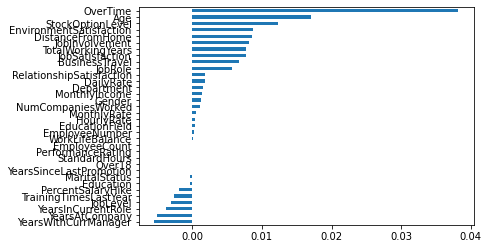

In [14]:
pi = pd.Series(permuter.feature_importances_, list(X_test_encoded.columns)).sort_values()
pi.plot.barh()
plt.show()

In [15]:
mean = permuter.feature_importances_.mean()
feature_importances = pd.Series(permuter.feature_importances_, list(X_test_encoded.columns))
score_selected = feature_importances[feature_importances>mean].sort_values(ascending=False)
score_selected

OverTime                   0.038210
Age                        0.017094
StockOptionLevel           0.012328
EnvironmentSatisfaction    0.008748
DistanceFromHome           0.008587
JobInvolvement             0.008165
TotalWorkingYears          0.007722
JobSatisfaction            0.007682
BusinessTravel             0.006697
JobRole                    0.005691
dtype: float64

In [16]:
feature_selected = score_selected.index.tolist()
feature_selected

['OverTime',
 'Age',
 'StockOptionLevel',
 'EnvironmentSatisfaction',
 'DistanceFromHome',
 'JobInvolvement',
 'TotalWorkingYears',
 'JobSatisfaction',
 'BusinessTravel',
 'JobRole']

In [17]:
X_train_selected = X_train[feature_selected]
X_test_selected = X_test[feature_selected]

In [18]:
pipe_new = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        max_depth=3
    )
)

##### **Q2. 순열중요도 계산 결과 score가 가장 높은 특성의 이름을 제출해 주세요.**

In [21]:
print(feature_selected[0])

OverTime


##### **Q3. 상위 특성으로 학습한 랜덤포레스트 모델의 검증 AUC score를 소수점 둘째 자리까지 제출해 주세요.**

In [22]:
cross_val_score(pipe_new, X_train_selected, y_train, cv=10, n_jobs=-1, scoring='roc_auc').mean().round(2)

0.8

##### **Q4. 평가 데이터셋에 대하여 모델의 AUC score를 소수점 둘째 자리까지 제출해 주세요.**

In [23]:
pipe_new.fit(X_train_selected, y_train)
y_test_pred = pipe_new.predict_proba(X_test_selected)[:, 1] # (체크) predict 말고 predict_proba 써야 함.
roc_auc_score(y_test, y_test_pred).round(2)
# y_test_pred

0.72

# 🥇 **도전 과제**

## **Part 4. 프로젝트 준비**

> 다음주부터 프로젝트가 진행됩니다. <br>
> 관심있는 프로젝트 주제와 데이터를 살펴보시고, 데이터가 정해졌다면 해당 데이터로 도전과제를 진행해보세요.

- 프로젝트에 사용할 데이터셋을 불러오세요.
- 모든 특성에 대하여 모델을 학습하고, 평가지표를 구하세요. 
  - 타겟과 문제에 적합한 모델을 사용합니다. 
- 순열중요도를 계산하세요.
- 순열중요도의 상위 특성만 사용하여 모델을 학습하고, 평가지표를 구하세요. 
- 모든 특성에 대하여 모델을 학습했을 때와 상위 특성만 사용하여 모델을 학습했을 때의 평가지표를 비교해 보세요. 